# Plotting routines

In [1]:
import pickle
import myplots.triangle as triangle
import corner
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [43]:
# load the data necessary for the plots
f = open('mcmc_all.txt')
mcmc_all = pickle.load(f)
f.close()

f = open('mcmc_power_law.txt')
mcmc_pl = pickle.load(f)
f.close()

f = open('mcmc_composite.txt')
mcmc_comp = pickle.load(f)
f.close()

f = open('mcmc_bic.txt')
mcmc_bic = pickle.load(f)
f.close()

label_param = [r"$\theta_E$", r"$\gamma'$", r"$\gamma_{ext}$", r"$\phi_{ext}$", r"$\gamma_{ext foreground}$", r"$\phi_{ext foreground}$",r"$\Delta\phi_{\rm Fermat}$",  r"$\theta_{pert}$", r"$\kappa_{G1+G2}$"]

mcmc_list = [mcmc_all, mcmc_pl, mcmc_comp, mcmc_bic]

label_run = ['all models', 'power-law', 'composite', 'BIC selection']

#royalblue vs crimson
# "Blues", "Greens"
cmap_list=["Blues", "Reds", "Greens", "Purples", "Oranges", "Reds", "BuPu", "Greys"]
color_list = ['royalblue', 'crimson', 'g', 'purple', 'orange', 'r', 'k']

In [3]:

rc('xtick', labelsize=10) 
rc('ytick', labelsize=10)

def parameter_systematicsplot(mcmc_list, labels, sample_idex, param_idex=[0, 1]):
    #idex_list_plot = np.linspace(0,8, 9)
    labels_idex = [labels[i] for i in param_idex]
    alpha = 0.8
    extents = triangle.extents_sample_multi(mcmc_list, percentile=0.999, sort=True)
    extents_idex = [extents[i] for i in param_idex]
    #extents[-1] = [0, 1000]
    kwargs_hist2d = {'alpha' :1., 'bins': 100, 'alpha_off': False, 'sigma2': True, 
                     'filled': True, 'plot_lines': True}
    kwargs_hist1d = {'bins': 50}
    kwargs_triangle = {'quantiles': [], 'color_list': color_list, 'cmap_list': cmap_list}
    mcmc_list_plot = []
    for i in range(0, len(mcmc_list)):
        if i in sample_idex:
            mcmc_list_plot.append(mcmc_list[i][:, param_idex])
    figure, axes = triangle.corner_multi(mcmc_list_plot, labels=labels_idex
                             , truth_color='r'
                             , extents=extents_idex
                             , hist1d_bool=True
                             #, color_list=color_list
                             #, cmap_list = cmap_list
                             , kwargs_hist2d = kwargs_hist2d
                             , kwargs_hist1d = kwargs_hist1d
                             #, color_scale_list=color_scale_list
                             , **kwargs_triangle
                             )

    ax = axes[0,len(param_idex)-1]
    ax.set_visible(True)
    ax.set_frame_on(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    k = 0
    patch_list = []
    for i, label in enumerate(label_run):
        if i in sample_idex:
            patch = mpatches.Patch(color=color_list[k], label=label, alpha=alpha)
            patch_list.append(patch)
            k += 1
    ax.legend(handles=patch_list, fontsize=25, handlelength=0.9, loc=1, frameon=False)
    #plt.savefig('/Users/sibirrer/Cosmology/Software/STRIDES/Papers/J1206cosmology/lens_mcmc_combined.pdf', format='pdf')        
    return ax

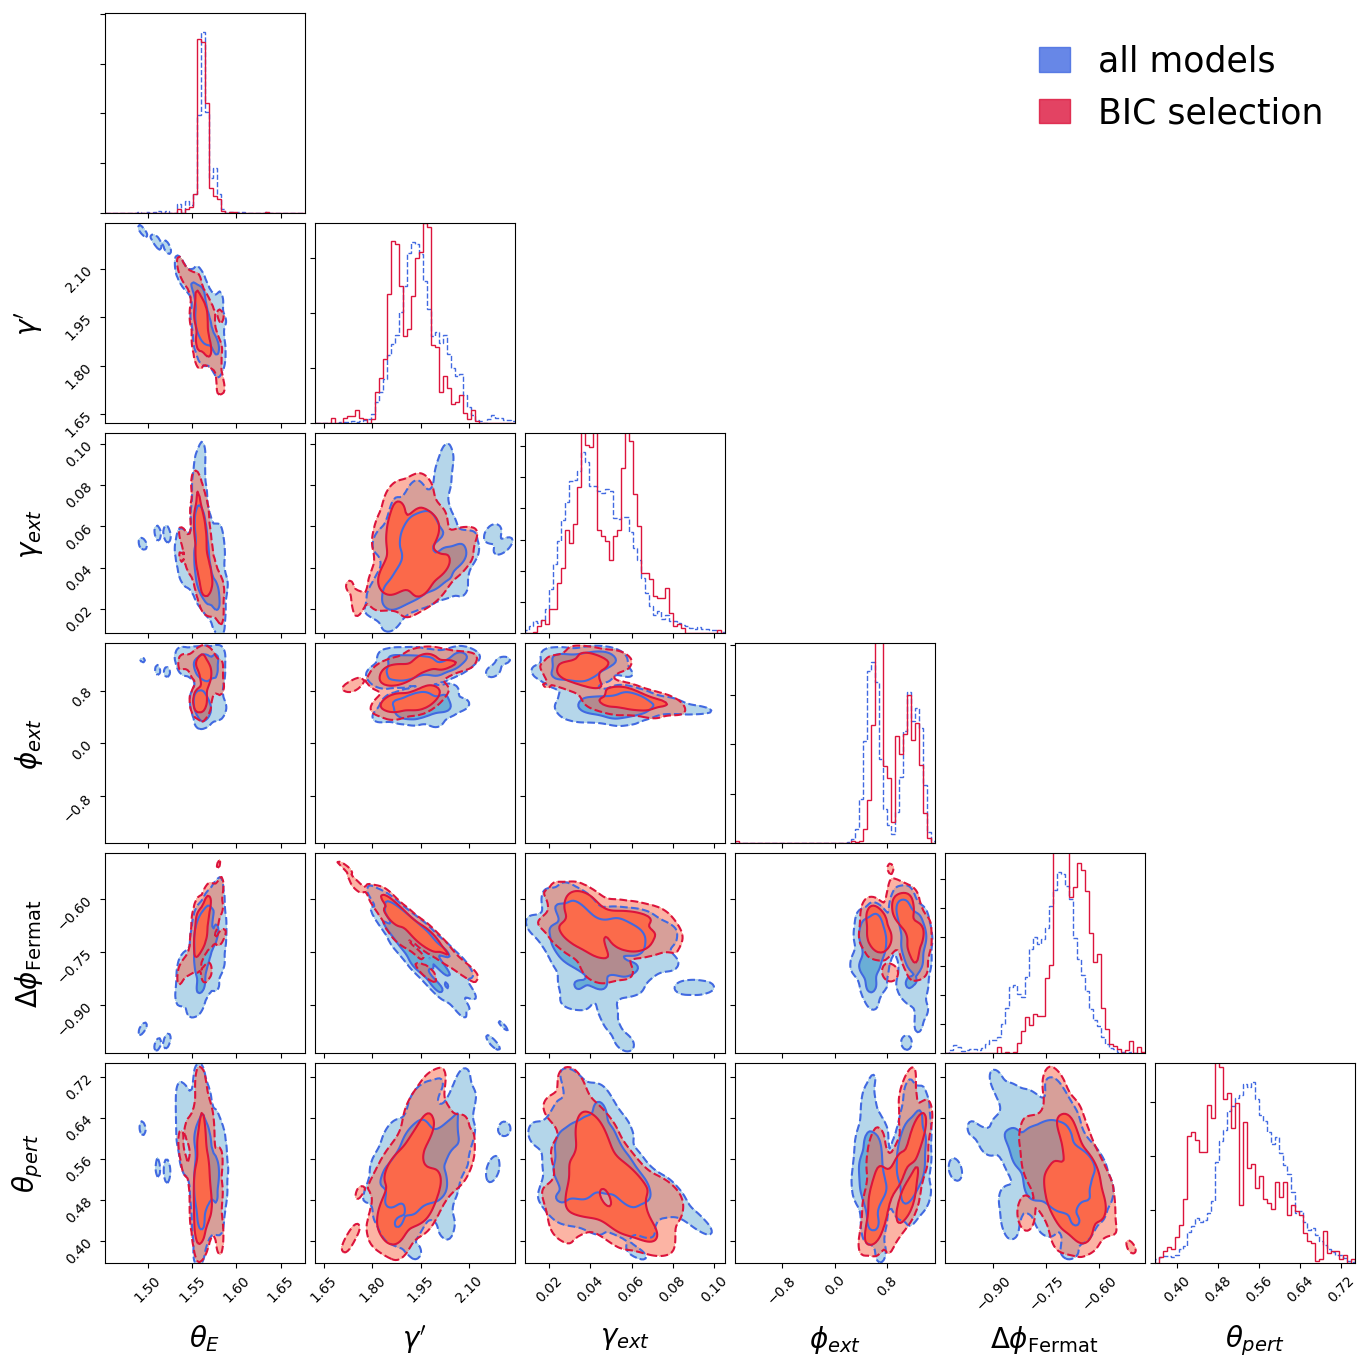

In [6]:
# BIC selectoin
parameter_systematicsplot(mcmc_list, label_param, sample_idex=[0, 3], param_idex=[0, 1, 2, 3, 6, 7])
#plt.savefig('/Users/sibirrer/Cosmology/Software/STRIDES/Papers/J1206cosmology/lens_mcmc_bic.pdf', format='pdf')        
plt.show()

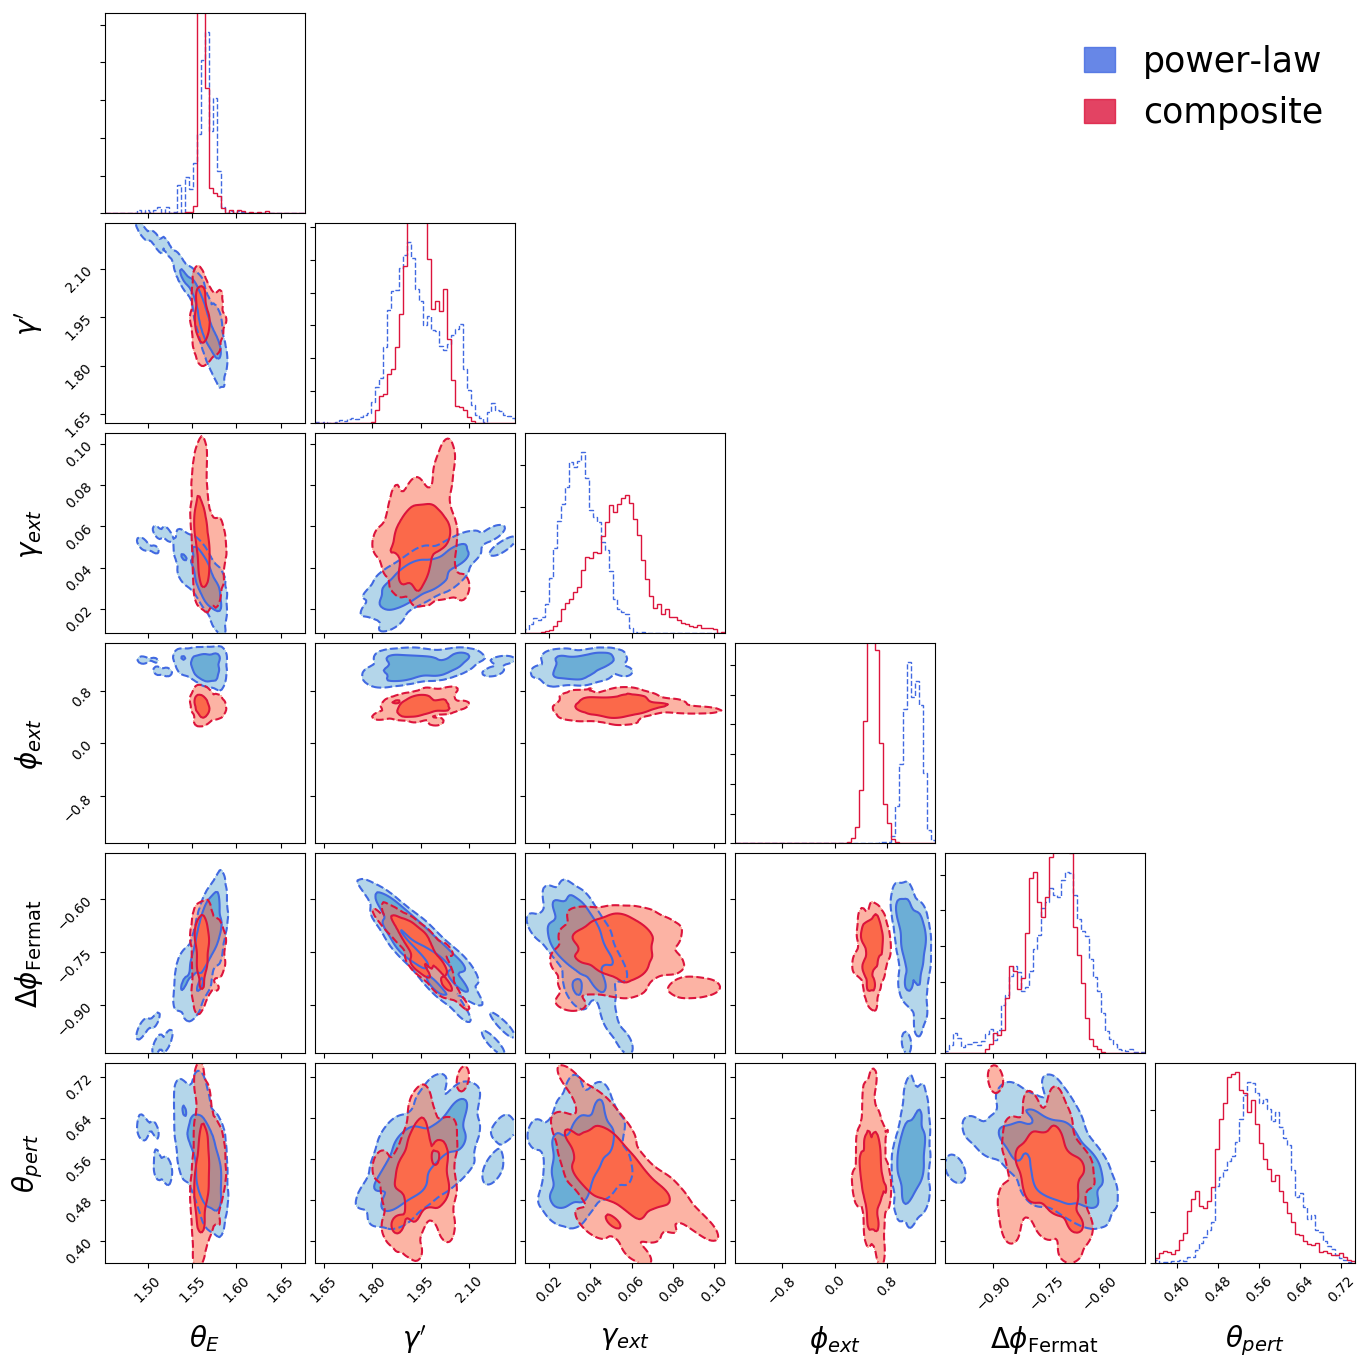

In [7]:
# power-law vs composite
parameter_systematicsplot(mcmc_list, label_param, sample_idex=[1, 2], param_idex=[0, 1, 2, 3, 6, 7])
#plt.savefig('/Users/sibirrer/Cosmology/Software/STRIDES/Papers/J1206cosmology/lens_mcmc_composite.pdf', format='pdf')        
plt.show()

## angular diamter posteriors

In [22]:
plotting_sample = 5000
filename_list = ['Dd_Ddt_all', 'Dd_Ddt_bic', 'Dd_Ddt_bic_power_law', 'Dd_Ddt_bic_composite',
                'Dd_Ddt_composite', 'Dd_Ddt_power_law', 'Dd_Ddt_foreground_shear',
                'Dd_Ddt_simple_shear', 'Dd_Ddt_triplet', 'Dd_Ddt_triplet_2',
                'Dd_Ddt_double_sersic', 'Dd_Ddt_double_sersic_2', 'Dd_Ddt_double_sersic_5',
                'Dd_Ddt_double_sersic_8', 'Dd_Ddt_mask_30', 'Dd_Ddt_mask_32']
sample_name_list = ['all samples', 'BIC selection', 'BIC power-law', 'BIC composite',
             'all composite', 'all power-law', 'foreground shear',
             'simple shear', 'triplet', 'triplet+2',
             'double Sersic', r'+n$_{\rm max}= 2$', r'+n$_{\rm max}= 5$',
             r'+n$_{\rm max}= 8$', '3.0" mask', '3.2" mask']
Dd_list = []
Ddt_list = []
# read in samples
for i, filename in enumerate(filename_list):
    f = open(filename)
    Dd, Ddt = pickle.load(f)
    f.close()
    num = len(Dd)
    if num > plotting_sample:
        idex = np.random.choice(num, plotting_sample)
        Dd = Dd[idex]
        Ddt = Ddt[idex]
    Dd_list.append(Dd)
    Ddt_list.append(Ddt)
    
# blind results
Dd_blind_list = []
Ddt_blind_list = []
Dd_median = np.median(Dd_list[0])
Ddt_median = np.median(Ddt_list[0])
for i in range(len(Dd_list)):
    Dd_bind = (Dd_list[i] - Dd_median) / Dd_median
    Ddt_bind = (Ddt_list[i] - Ddt_median) / Ddt_median
    Dd_blind_list.append(Dd_bind)
    Ddt_blind_list.append(Ddt_bind)

In [57]:
def plot_sample_comparison(ax, index_list):
    extent = [[-1, 1], [-1, 1]]
    alpha = 0.5
    bins = 200
    k = 0
    for i in range(len(sample_name_list)):
        if i in index_list:
            C = triangle.hist2d_sigma(Dd_blind_list[i], Ddt_blind_list[i],
                                    ax, extent, cmap=cmap_list[k], color=color_list[k],
                                    alpha=alpha, bins=bins, max_sample=2000, 
                                    alpha_off=False, sigma2=True, filled=False)
            k += 1
    patch_list = []
    k = 0
    for i, label in enumerate(sample_name_list):
        label_i = label# + " " + str(round(np.std(Dd_ds_dds_samples_list[i]/Dd_ds_dds_sub), 2)) + " " + str(round(np.std(Dd_samples_list[i]/Dd_sub), 2))
        if i in index_list:
            patch = mpatches.Patch(color=color_list[k], label=label_i, alpha=alpha)
            patch_list.append(patch)
            k += 1
    ax.legend(handles=patch_list, fontsize=10, handlelength=0.9, loc=2, frameon=False)
    return ax



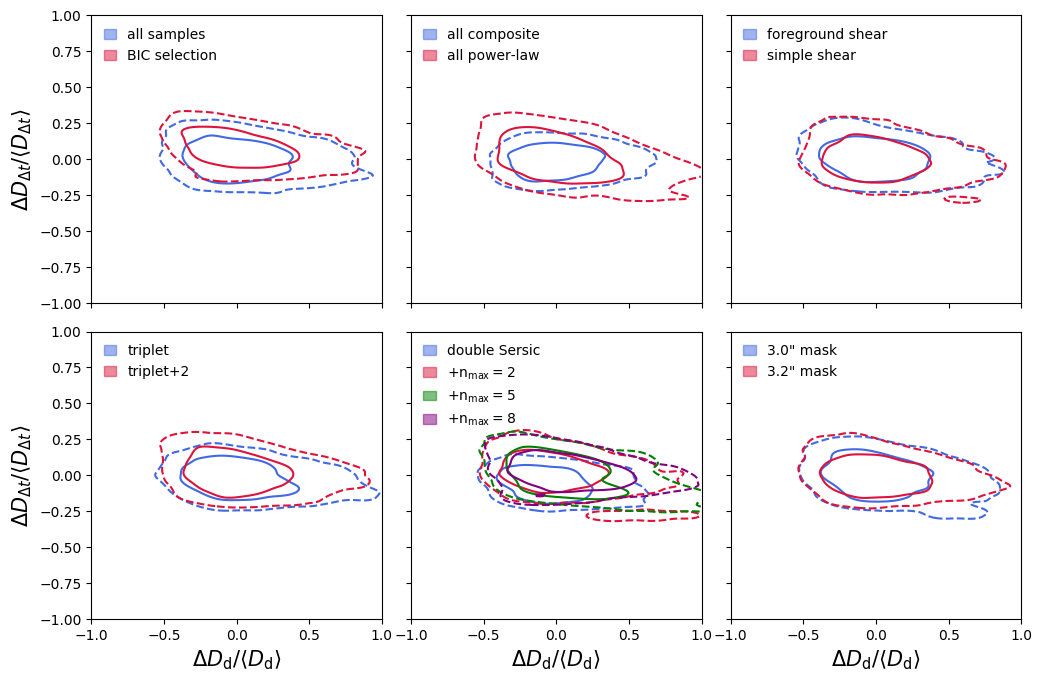

In [86]:
f, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
label_fontisize=15
plot_sample_comparison(ax=axes[0, 0], index_list=[0, 1]) # all vs BIC
ax=axes[0, 0]
ax.set_ylabel(r"$\Delta D_{\Delta t} / \left< D_{\Delta t}\right>$", fontsize=label_fontisize)
plot_sample_comparison(ax=axes[0, 1], index_list=[4, 5]) # composite vs power-law
plot_sample_comparison(ax=axes[0, 2], index_list=[6, 7]) # with/out foreground shear
plot_sample_comparison(ax=axes[1, 0], index_list=[8, 9]) # 3 or 5 perturbers
ax=axes[1, 0]
ax.set_ylabel(r"$\Delta D_{\Delta t} / \left< D_{\Delta t}\right>$", fontsize=label_fontisize)
ax.set_xlabel(r"$\Delta D_{\rm d} / \left< D_{\rm d}\right>$", fontsize=label_fontisize)
plot_sample_comparison(ax=axes[1, 1], index_list=[10, 11, 12, 13]) # 3 or 5 perturbers
ax=axes[1, 1]
ax.set_xlabel(r"$\Delta D_{\rm d} / \left< D_{\rm d}\right>$", fontsize=label_fontisize)
plot_sample_comparison(ax=axes[1, 2], index_list=[14, 15]) # small vs big mask
ax=axes[1, 2]
ax.set_xlabel(r"$\Delta D_{\rm d} / \left< D_{\rm d}\right>$", fontsize=label_fontisize)
#f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
plt.show()


In [69]:
def sample_comparison_1d_Dd(ax, index_list, color_list_plot=None, line_style_list=None):
    extent = [-1, 1]
    bins = 50
    if color_list_plot is None:
        color_list_plot = color_list
    if line_style_list is None:
        line_style_list = [':'] * len(color_list)
    k = 0
    for i in index_list:
        C = ax.hist(Dd_blind_list[i], 
                            bins=np.linspace(extent[0], extent[1], bins), 
                            histtype="step", normed=True, 
                            color=color_list_plot[k], linestyle=line_style_list[k])
        k += 1
    return ax

def sample_comparison_1d_Ddt(ax, index_list, color_list_plot=None, line_style_list=None):
    extent = [-0.5, 0.5]
    bins = 50
    if color_list_plot is None:
        color_list_plot = color_list
    if line_style_list is None:
        line_style_list = [':'] * len(color_list)
    k = 0
    for i in index_list:
        C = ax.hist(Ddt_blind_list[i], 
                        bins=np.linspace(extent[0], extent[1], bins), 
                        histtype="step", normed=True,
                        color=color_list_plot[k], linestyle=line_style_list[k])

        k += 1
    return ax


def plot_legend(ax, index_list, color_list_plot, line_style_list):

    k = 0
    for i in index_list:
            ax.plot(0,0, color=color_list_plot[k], linestyle=line_style_list[k], label=sample_name_list[i])
            k += 1
    ax.set_frame_on(False)
    ax.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
    ax.legend()
    return ax

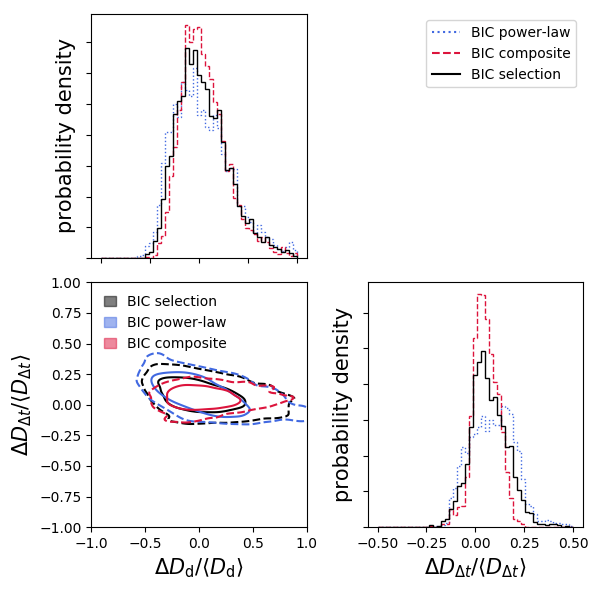

In [89]:
cmap_list=["Blues", "Reds", "Greys", "Greens", "Purples", "Oranges", "Reds", "BuPu"]
color_list = ['k', 'royalblue', 'crimson', 'g', 'purple', 'orange', 'r', 'k']
index_list_plot = [2, 3, 1]
color_list_plot = ['royalblue', 'crimson', 'k']
line_style_list = [':', '--', '-']
f, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=False, sharey=False)
sample_comparison_1d_Ddt(axes[1, 1], index_list=index_list_plot,
                         color_list_plot=color_list_plot,
                         line_style_list=line_style_list)

ax=axes[0, 0]
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel(r"probability density", fontsize=label_fontisize)
ax=axes[1, 0]
ax.set_ylabel(r"$\Delta D_{\Delta t} / \left< D_{\Delta t}\right>$", fontsize=label_fontisize)
ax.set_xlabel(r"$\Delta D_{\rm d} / \left< D_{\rm d}\right>$", fontsize=label_fontisize)
ax=axes[1, 1]
ax.set_xlabel(r"$\Delta D_{\Delta t} / \left< D_{\Delta t}\right>$", fontsize=label_fontisize)
ax.set_yticklabels([])
ax.set_ylabel(r"probability density", fontsize=label_fontisize)

sample_comparison_1d_Dd(axes[0, 0], index_list=index_list_plot,
                        color_list_plot=color_list_plot,
                        line_style_list=line_style_list)
plot_sample_comparison(ax=axes[1, 0], index_list=[2, 3, 1])
plot_legend(ax=axes[0, 1], index_list=index_list_plot, color_list_plot=color_list_plot,
                        line_style_list=line_style_list)
f.tight_layout()
plt.show()